In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn

wn.filterwarnings("ignore", category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pet-da/pet_supplies_2212.csv


In [3]:
df=pd.read_csv('../input/pet-da/pet_supplies_2212.csv')
df.head(20)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
5,6,Housing,Dog,Small,30.77,874.58,7.0,0
6,7,Housing,Dog,Small,31.04,875.07,5.0,0
7,8,Toys,Cat,medium,28.9,1074.31,4.0,0
8,9,Equipment,Fish,MEDIUM,17.82,503.67,5.0,0
9,10,Medicine,Dog,medium,24.93,838.88,8.0,0


# Handling Missing Values

In [4]:
#Looking out for any NaN values
# Count of NaN values per column
null_counts = df.isnull().sum()
print("Number of NaN values per column:")
print(null_counts)

Number of NaN values per column:
product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64


In [5]:
# we have ratings data as NaN, we will replace the Na values with 0 as per the instructions
df['rating']=df['rating'].fillna(0)
print('\n NaN Ratings replaced with 0: \n')
print(df.to_string())


 NaN Ratings replaced with 0: 

      product_id   category animal    size     price    sales  rating  repeat_purchase
0              1       Food   Bird   large      51.1  1860.62     7.0                1
1              2    Housing   Bird  MEDIUM     35.98   963.60     6.0                0
2              3       Food    Dog  medium     31.23   898.30     5.0                1
3              4   Medicine    Cat   small     24.95   982.15     6.0                1
4              5    Housing    Cat   Small     26.18   832.63     7.0                1
5              6    Housing    Dog   Small     30.77   874.58     7.0                0
6              7    Housing    Dog   Small     31.04   875.07     5.0                0
7              8       Toys    Cat  medium      28.9  1074.31     4.0                0
8              9  Equipment   Fish  MEDIUM     17.82   503.67     5.0                0
9             10   Medicine    Dog  medium     24.93   838.88     8.0                0
10        

In [12]:
#we also have some Price values as Unlisted, we have to replace them with overall median price
#First we need to make the Price column to numeric and then fill it with Na then replace them with median values
median_price = pd.to_numeric(df['price'], errors='coerce').median()

# Replace 'unlisted' strings with NaN, and then fill NaN values with the median price
df['price'] = df['price'].replace('unlisted', np.nan)
df['price'] = df['price'].fillna(median_price).round(2) #rounding to 2 decimal places

print("\nDataFrame with 'unlisted' replaced by median in 'price' column: \n")
print(df.to_string())


DataFrame with 'unlisted' replaced by median in 'price' column: 

      product_id   category animal    size   price    sales  rating  repeat_purchase
0              1       Food   Bird   large    51.1  1860.62     7.0                1
1              2    Housing   Bird  MEDIUM   35.98   963.60     6.0                0
2              3       Food    Dog  medium   31.23   898.30     5.0                1
3              4   Medicine    Cat   small   24.95   982.15     6.0                1
4              5    Housing    Cat   Small   26.18   832.63     7.0                1
5              6    Housing    Dog   Small   30.77   874.58     7.0                0
6              7    Housing    Dog   Small   31.04   875.07     5.0                0
7              8       Toys    Cat  medium    28.9  1074.31     4.0                0
8              9  Equipment   Fish  MEDIUM   17.82   503.67     5.0                0
9             10   Medicine    Dog  medium   24.93   838.88     8.0                

In [7]:
# The category column has missing values marked as '-' replacing them with 'Unknown' as per Instructions
df['category']=df['category'].replace('-','Unknown')
print('\n Category with - data replaced with Unknown: \n')
print(df.to_string())


 Category with - data replaced with Unknown: 

      product_id   category animal    size   price    sales  rating  repeat_purchase
0              1       Food   Bird   large    51.1  1860.62     7.0                1
1              2    Housing   Bird  MEDIUM   35.98   963.60     6.0                0
2              3       Food    Dog  medium   31.23   898.30     5.0                1
3              4   Medicine    Cat   small   24.95   982.15     6.0                1
4              5    Housing    Cat   Small   26.18   832.63     7.0                1
5              6    Housing    Dog   Small   30.77   874.58     7.0                0
6              7    Housing    Dog   Small   31.04   875.07     5.0                0
7              8       Toys    Cat  medium    28.9  1074.31     4.0                0
8              9  Equipment   Fish  MEDIUM   17.82   503.67     5.0                0
9             10   Medicine    Dog  medium   24.93   838.88     8.0                0
10            11 

In [8]:
#handling repeat_purchase nan or random values other than 0 and 1
df = df[df['repeat_purchase'].notna() & df['repeat_purchase'].isin([0, 1])] #isin method is a boolean which return either flase or true

print("\n New Data: \n")
print(df.to_string())


 New Data: 

      product_id   category animal    size   price    sales  rating  repeat_purchase
0              1       Food   Bird   large    51.1  1860.62     7.0                1
1              2    Housing   Bird  MEDIUM   35.98   963.60     6.0                0
2              3       Food    Dog  medium   31.23   898.30     5.0                1
3              4   Medicine    Cat   small   24.95   982.15     6.0                1
4              5    Housing    Cat   Small   26.18   832.63     7.0                1
5              6    Housing    Dog   Small   30.77   874.58     7.0                0
6              7    Housing    Dog   Small   31.04   875.07     5.0                0
7              8       Toys    Cat  medium    28.9  1074.31     4.0                0
8              9  Equipment   Fish  MEDIUM   17.82   503.67     5.0                0
9             10   Medicine    Dog  medium   24.93   838.88     8.0                0
10            11       Food    Dog   Large   40.87 

In [9]:
#Checking more NaN Values
null_counts = df.isnull().sum()
print("Number of NaN values per column:")
print(null_counts)

Number of NaN values per column:
product_id         0
category           0
animal             0
size               0
price              0
sales              0
rating             0
repeat_purchase    0
dtype: int64


# Solutions

# Q1: For every column in the data:

In [ ]:
'''
a. Sate whether the values match the description given in the table above.
b. State the number of missing values in the column.
c. Describe what you did to make values match the description if they did not match.

Anwers: 
a) The above column data matches the discription/criteria except the data of Price,Category and Ratings columns.
These 3 columns contains Missing/NaN values.

b) Number of Missing Values in each column: 
Ratings: 150 'Na values'  ***null_counts = df.isnull().sum()***
Category: 25 '-' count     ***unlisted_count = (df['category'] == '-').sum()***
Price: 150 'Unlisted' count ***unlisted_count = (df['price'] == 'unlisted').sum()***

c) To remove Rating missing values i replaced them with 0 using fillna() functions //fillna(0) it fill the entire Na values with 0
   To Handle Price Missing data and to replace them with overall median value i did following steps: 
    1: Firstly i convert the Price data into numeric format
    2: replace all 'unlisted' values to na using 'to_numeric function' and  Numpy's np.nan function in combination with pandas replace method()
    3: replace the existing na values with overall median using median()function
   To  Handle category Missing vlaues i used replace() method to replace '-' with 'unknown' // .replace('-','Unknown')

These are the few Steps i performed to make the dataset values align with the provided description.

'''

# Q2:  Create a visualization that shows how many products are repeat purchases

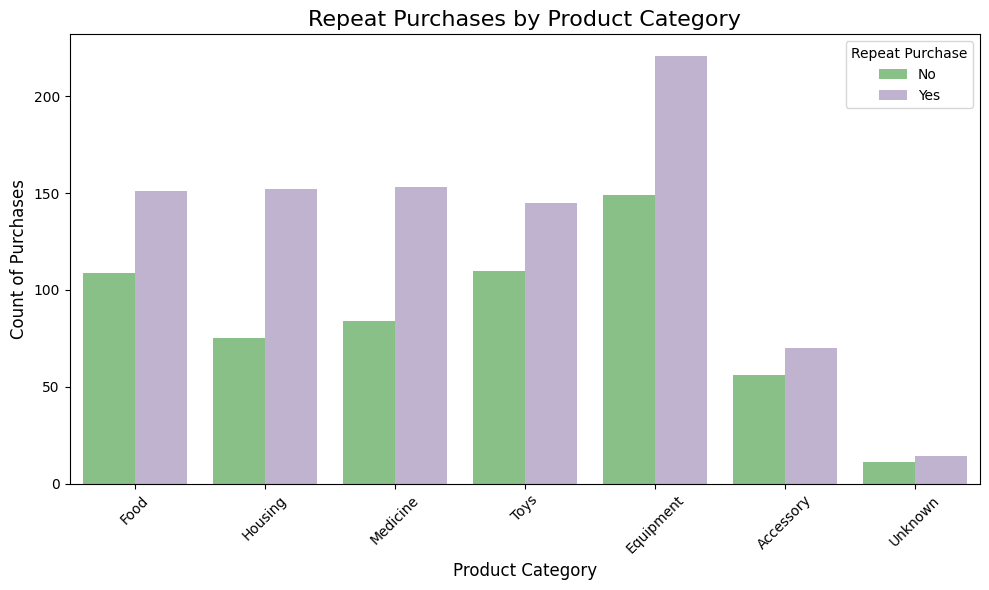

In [16]:

plt.figure(figsize=(10, 6))
cnp=sns.countplot(data=df, x='category', hue='repeat_purchase', palette='Accent') #count plot is best for visualizing categorial values
#count plot automatically aplly .groupby method on categorial values
handles, labels = cnp.get_legend_handles_labels()
# Map the original '0' and '1' to 'No' and 'Yes'
labels = ['No' if label == '0' else 'Yes' for label in labels]
cnp.legend(handles, labels, title='Repeat Purchase')
# Add labels and title
plt.title('Repeat Purchases by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count of Purchases', fontsize=12)


# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
'''
Q2 Solutins:
a) State which category of the variable repeat purchases has the most observations

   From the above visualtization we can conclude that among all 6 Product categories
   the heighest repeat purchases is for product 'Equipment'
   
b) Explain whether the observations are balanced across categories of the variable repeat purchases

   From the above visualization we can conclude that the repeat_purchase values are imbalanced for each categories
   i.e. the frequency of non repeated purchases < repeat purchases. Hence the imbalance.
   
'''

# Q3: Describe the distribution of all of the sales. Your answer must include a visualization that shows the distribution.

count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64


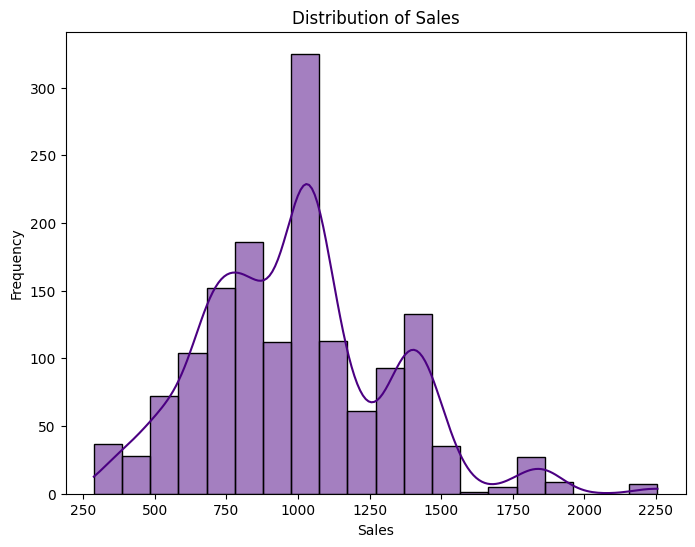

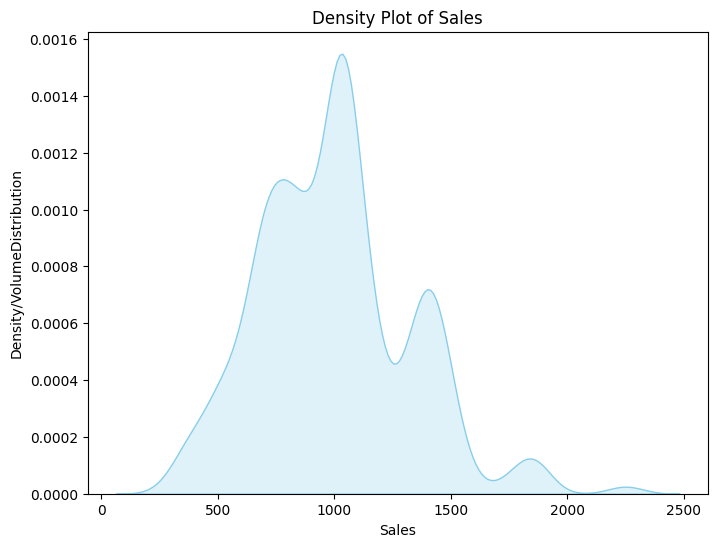

In [25]:

# Calculate summary statistics
sales_stat = df['sales'].describe() #used describe method to analyze statics distribution of sales data 

print(sales_stat)

# Visualizing the distribution with a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['sales'], kde=True, bins=20, color='indigo') #kernel density esitimate | kde
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Density plot for a smoother distribution view //alternate plot to better understand the spread of slaes
plt.figure(figsize=(8, 6))
sns.kdeplot(df['sales'], shade=True, color='skyblue')
plt.title('Density Plot of Sales')
plt.xlabel('Sales')
plt.ylabel('Density/VolumeDistribution')
plt.show()

 # Verdict: ***From the above visualization, we can conclude that at a mean revenue of 1000, the sales distribution is highest among all six product categories.***

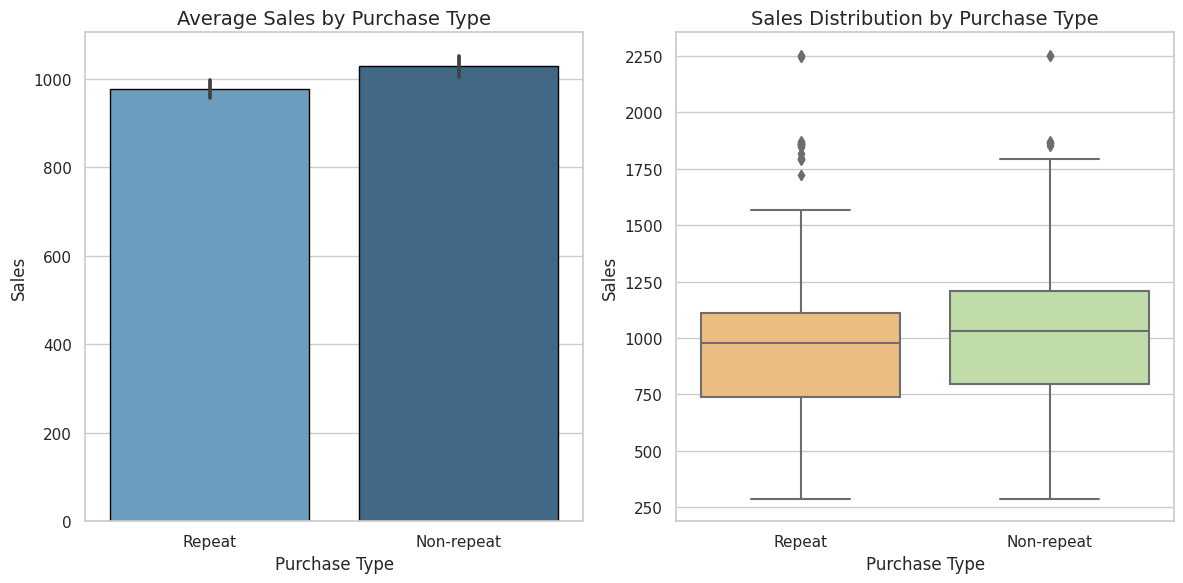

In [36]:

df['purchase_type'] = df['repeat_purchase'].map({1: 'Repeat', 0: 'Non-repeat'}) #creating custom Names for 1,0

sns.set(style="whitegrid") #styling the seaborn plot area as grid having white bg

plt.figure(figsize=(12, 6))

# Bar Plot: Compare sales revenue for repeat vs non-repeat purchases
plt.subplot(1, 2, 1)
sns.barplot(x="purchase_type", y="sales", data=df, palette="Blues_d", edgecolor="black")
plt.title("Average Sales by Purchase Type", fontsize=14)
plt.xlabel("Purchase Type", fontsize=12)
plt.ylabel("Sales", fontsize=12)

# Box Plot: Show the distribution of sales for repeat vs non-repeat purchases

plt.subplot(1, 2, 2) #subplot method is used here to plot multiple graphs onto same canvas
sns.boxplot(x="purchase_type", y="sales", data=df, palette="Spectral")
plt.title("Sales Distribution by Purchase Type", fontsize=14)
plt.xlabel("Purchase Type", fontsize=12)
plt.ylabel("Sales", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

 # Verdict:  ***From the above visualization, we can conclude that the sales revenue is higher for non-repeat purchases compared to repeat purchases, which are slightly lower***


# Conclusion


In [ ]:
'''
The above visualizations lead to the following conclusions:

Product Sales Performance:

The product named 'Equipment' has the highest sales value, indicating it is the 
store's best-selling product.On the other hand, 'Accessories' has the lowest 
sales value, suggesting that there is an opportunity to focus on improving 
the sales of this product in order to increase overall sales and revenue.

Sales Distribution at Mean Revenue:

At a mean sales revenue of 1000, we observe the highest sales distribution.
This indicates a key insight into customer behavior and their median spending
patterns, showing where most transactions fall.

Repeat Purchases and Sales Revenue:

Interestingly, sales revenue is higher when there are no repeat purchases, suggesting
that customers may prefer to make bulk purchases rather than repeatedly buying
individual items. This behavior could point to opportunities for promotional
strategies that incentivize bulk buying or highlight product bundles.

Customer Behavior Insights: The relationship between repeat purchases and sales
revenue could indicate that a one-time purchase for high-value products like
'Equipment' generates higher overall sales. Understanding these trends
can help in designing marketing strategies targeting both first-time
buyers and repeat customers.

Opportunity for Growth: Focusing on increasing the sales of 'Accessories',
possibly through targeted promotions or bundling with higher-selling
products, could lead to a balanced revenue growth across all product
categories.

'''

In [38]:
#Modified dataset
df['size']=df['size'].str.lower() #inconsistent cases of size strings converting all of them to lowercase for more beautiful view
df.to_csv('Modified_pets.csv', index=False) #creating a downlaodable csv file using pandas .to_csv, .to_excel methods